# SF Crime Classification Challenge

My approach for the kaggle's San Francisco Crime Classification challenge.

### Data exploration

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext watermark
%watermark -v -d -u -p pyprind

last updated: 2016-07-12 

CPython 3.5.1
IPython 4.2.0

pyprind 2.9.8


In [2]:
training_data = pd.read_csv('/Users/user/Jupyter/datasets/SFCCC_dataset/train 2.csv')
training_data.tail(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [3]:
training_data = training_data.sample(frac=0.5)

In [4]:
training_data.tail(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
793717,2004-02-20 03:30:00,MISSING PERSON,FOUND PERSON,Friday,TARAVAL,LOCATED,0 Block of THRIFT ST,-122.455319,37.717428
581044,2007-02-22 09:00:00,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Thursday,SOUTHERN,NONE,800 Block of BRANNAN ST,-122.404385,37.772196


In [5]:
testing_data = pd.read_csv('/Users/user/Jupyter/datasets/SFCCC_dataset/train 2.csv')
testing_data.tail(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


Let's split the `Dates` column in order to see if we can model a time or date feature:

## Training data

In [6]:
training_data["Dates"], training_data["Time"] = zip(*training_data["Dates"].str.split().tolist())
training_data.tail(2)
# If we wanted to delete the dates or time column:
#del training_data["Dates"] 

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Time
793717,2004-02-20,MISSING PERSON,FOUND PERSON,Friday,TARAVAL,LOCATED,0 Block of THRIFT ST,-122.455319,37.717428,03:30:00
581044,2007-02-22,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Thursday,SOUTHERN,NONE,800 Block of BRANNAN ST,-122.404385,37.772196,09:00:00


## Testing data

Let's apply the previous procedure just to give coherence to our data:

In [7]:
testing_data["Dates"], testing_data["Time"] = zip(*testing_data["Dates"].str.split().tolist())
testing_data.tail(2)
# If we wanted to delete the dates or time column:
#del training_data["Dates"] 

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Time
878047,2003-01-06,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,00:01:00
878048,2003-01-06,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212,00:01:00


I will just save them into a new .csv file:

In [8]:
training_data.to_csv('/Users/user/Jupyter/datasets/SFCCC_dataset/preprocessed_train.csv', index=False)
testing_data.to_csv('/Users/user/Jupyter/datasets/SFCCC_dataset/preprocessed_test.csv', index=False)

In [9]:
training_data.shape, testing_data.shape

((439024, 10), (878049, 10))

In [10]:
training_data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Time           object
dtype: object

In [11]:
testing_data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Time           object
dtype: object

### Check missing values

In [12]:
training_data.apply(lambda x: sum(x.isnull()))

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Time          0
dtype: int64

In [13]:
testing_data.apply(lambda x: sum(x.isnull()))

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Time          0
dtype: int64

### Look at categories of all object variables:

In [14]:
columns = ['Dates','Category','Descript'\
           ,'DayOfWeek','PdDistrict','Resolution','Address','X','Y', 'Time']

for column in columns:
    print ('\n+++ Frequency count for variable %s +++\n'%column)
    print (training_data[column].value_counts())


+++ Frequency count for variable Dates +++

2011-01-01    332
2013-11-01    314
2006-01-01    311
2013-10-04    292
2004-04-01    278
2003-10-01    276
2012-10-01    272
2014-08-09    272
2003-11-01    271
2013-06-01    269
2004-09-01    268
2013-04-05    266
2013-06-30    265
2013-08-09    264
2012-10-17    262
2014-04-19    262
2012-10-06    261
2004-04-27    260
2003-04-01    260
2013-08-19    260
2013-09-06    259
2013-01-25    259
2006-10-06    259
2007-11-01    258
2005-07-01    258
2004-04-17    258
2009-09-01    258
2014-10-29    257
2009-11-01    256
2013-03-08    256
             ... 
2004-11-25    138
2010-02-23    138
2005-12-26    138
2009-02-08    138
2010-07-26    137
2008-04-02    136
2006-12-28    135
2010-04-11    133
2011-04-24    132
2009-11-26    132
2011-07-11    132
2011-07-12    131
2004-12-26    131
2009-12-26    131
2008-11-27    130
2006-03-12    128
2009-12-25    127
2014-12-25    126
2013-12-26    126
2004-09-19    126
2006-12-25    116
2003-12-25    108
2

In [15]:
training_data.loc[training_data.Dates == "2011-01-01", "Category"].value_counts().sort_values()[::-1][:10]

OTHER OFFENSES     68
NON-CRIMINAL       52
LARCENY/THEFT      48
ASSAULT            34
SUSPICIOUS OCC     22
VANDALISM          14
BURGLARY           12
FRAUD              11
SECONDARY CODES    10
MISSING PERSON      9
Name: Category, dtype: int64

### Categorical values

In [16]:
training_data['Dates'].values

array(['2006-02-07', '2008-10-29', '2010-02-10', ..., '2013-01-25',
       '2004-02-20', '2007-02-22'], dtype=object)

In [17]:
#Dates 	Category 	Descript DayOfWeek 	PdDistrict 	Resolution 	Address 	X 	Y 	Time
from sklearn import preprocessing

dates_le = preprocessing.LabelEncoder()
category_le = preprocessing.LabelEncoder()
day_of_week_le = preprocessing.LabelEncoder()
pd_district_le = preprocessing.LabelEncoder()
resolution_le = preprocessing.LabelEncoder()
time_le = preprocessing.LabelEncoder()

dates_feats = dates_le.fit_transform(training_data.Dates)
category_feats= category_le.fit_transform(training_data.Category)
day_of_week_feats= day_of_week_le.fit_transform(training_data.DayOfWeek)
pd_district_feats= pd_district_le.fit_transform(training_data.Descript)
resolution_feats=resolution_le.fit_transform(training_data.Resolution)
time_feats= time_le.fit_transform(training_data.Time)

import scipy as sparse

X_combined_features = sparse.vstack([dates_feats, \
                                     day_of_week_feats, pd_district_feats, \
                                     resolution_feats,time_feats]).T
y = category_feats

print (X_combined_features.shape)
print(type(X_combined_features))
print(y.shape)
print(type(y))



(439024, 5)
<class 'numpy.ndarray'>
(439024,)
<class 'numpy.ndarray'>


### PCA

In [ ]:
from sklearn.decomposition import PCA
X_combined_features = PCA(n_components=1).fit_transform(X_combined_features)
type(X_combined_features)
X_combined_features.shape

In [18]:
from sklearn import cross_validation
#Usamos una estrategia Cross validation ShuffleSplit:
#(http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.ShuffleSplit.html
#sklearn.cross_validation.ShuffleSplit)
ss = cross_validation.KFold(n = len(y), )

import numpy
numpy.set_printoptions(threshold=numpy.nan)


for train_index, test_index in ss:
    "\n \n Entrenamiento 30% de 2598:\n", train_index,"\n \n Prueba 70% de 2598:\n", test_index
    X_train, X_test = X_combined_features[train_index], X_combined_features[test_index]
    y_train, y_test = y[train_index], y[test_index]


y_=[]
prediction_=[]

In [21]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pyprind

#Compute training time elapsed
pbar = pyprind.ProgBar(45, title='XGboost Fitting time:', width=120, bar_char='█')
for _ in range(45):
    #Fiting
    clf = XGBClassifier().fit(X_train, y_train)
    pbar.update()
#End of bar
    

#Compute predicting time elapsed
pbar2 = pyprind.ProgBar(45, title='\nXGboost classification time:', width=120, bar_char='#')
for _ in range(45):
    prediction = clf.predict(X_test)
    pbar2.update()
#End of bar

y_.extend(y_test)
prediction_.extend(prediction)

XGboost Fitting time:
0%                                         100%
[█████████████████████████████████████████████] | ETA: 00:00:00
Total time elapsed: 02:54:56

XGboost classification time:
0%                                         100%
[                                             ]/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
[#############################################] | ETA: 00:00:00
Total time elapsed: 00:13:01


AttributeError: 'XGBClassifier' object has no attribute 'predict_log_proba'

In [ ]:
#log_proba = clf.predict_log_proba(X_test)

#Return probabilities, useful for data submision
probabilistic_prediction = clf.predict_proba(X_test)

In [27]:
print('prediction:',prediction.shape)
#print('log_proba:',log_proba.shape)
#print('probabilistic_prediction:',probabilistic_prediction.shape)

print(type(prediction))
#print(type(log_proba))
#print(type(probabilistic_prediction))

prediction: (146341,)
<class 'numpy.ndarray'>


In [28]:
print(type(X_test))
X_test.shape

<class 'numpy.ndarray'>


(146341, 5)

In [ ]:
df = pd.DataFrame(probabilistic_prediction.tolist())
df.to_csv('/Users/user/Desktop/list.csv', index=False)

### Metrics and evaluation

In [29]:
from sklearn.metrics import accuracy_score
acc_scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=10)
print("\n acc_scores como arreglo: \n",acc_scores)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(), acc_scores.std() * 2))

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: Visi


 acc_scores como arreglo: 
 [ 0.99081535  0.99139432  0.9915289   0.99176659  0.99258601  0.99152571
  0.99015856  0.99166069  0.99145474  0.99131683]

Accuracy: 0.99 (+/- 0.00)


/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)


In [32]:
from sklearn.externals import joblib
joblib.dump(clf, '/Users/user/Jupyter/ml_notes/SF_CCC/xgboost_1.pkl')


['/Users/user/Jupyter/ml_notes/SF_CCC/xgboost_1.pkl',
 '/Users/user/Jupyter/ml_notes/SF_CCC/xgboost_1.pkl_01.npy']

In [33]:
clf2 = joblib.load('/Users/user/Jupyter/ml_notes/SF_CCC/xgboost_1.pkl')


#Compute predicting time elapsed
pbar2 = pyprind.ProgBar(45, title='\nXGboost classification time:', width=120, bar_char='#')
for _ in range(45):
    prediction = clf2.predict(X_test)
    pbar2.update()
#End of bar




XGboost classification time:
0%                                         100%
[                                             ]/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
[#############################################] | ETA: 00:00:00
Total time elapsed: 00:11:42


In [34]:
from sklearn.metrics import accuracy_score
acc_scores = cross_validation.cross_val_score(clf2, X_train, y_train, cv=10)
print("\n acc_scores como arreglo: \n",acc_scores)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(), acc_scores.std() * 2))

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: Visi


 acc_scores como arreglo: 
 [ 0.99081535  0.99139432  0.9915289   0.99176659  0.99258601  0.99152571
  0.99015856  0.99166069  0.99145474  0.99131683]

Accuracy: 0.99 (+/- 0.00)


/usr/local/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)


In [37]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix
print( 'Accuracy              :', accuracy_score(y_, prediction_))
print( 'Precision             :', precision_score(y_, prediction_,average='weighted'))
print( 'Recall                :', recall_score(y_, prediction_,average='weighted'))
print( 'F-score               :', f1_score(y_, prediction_,average='weighted'))
print( '\nClasification report:\n', classification_report(y_,prediction_))
print('\nConfusion matrix   :\n',confusion_matrix(y_, prediction_))

Accuracy              : 0.991137138601
Precision             : 0.991256660193


/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall                : 0.991137138601
F-score               : 0.991100992564


/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Clasification report:
              precision    recall  f1-score   support

          0       1.00      0.98      0.99       253
          1       0.99      0.98      0.99     12713
          2       1.00      1.00      1.00        69
          3       1.00      0.91      0.95        46
          4       1.00      1.00      1.00      6093
          5       1.00      1.00      1.00       759
          6       1.00      1.00      1.00       390
          7       1.00      0.99      0.99      8876
          8       1.00      1.00      1.00       742
          9       1.00      1.00      1.00       201
         10       1.00      1.00      1.00        53
         11       1.00      0.93      0.96        73
         12       1.00      0.99      1.00      1769
         13       1.00      0.99      0.99      2706
         14       1.00      1.00      1.00        23
         15       0.91      1.00      0.95       384
         16       1.00      1.00      1.00     29134
         17       1.0

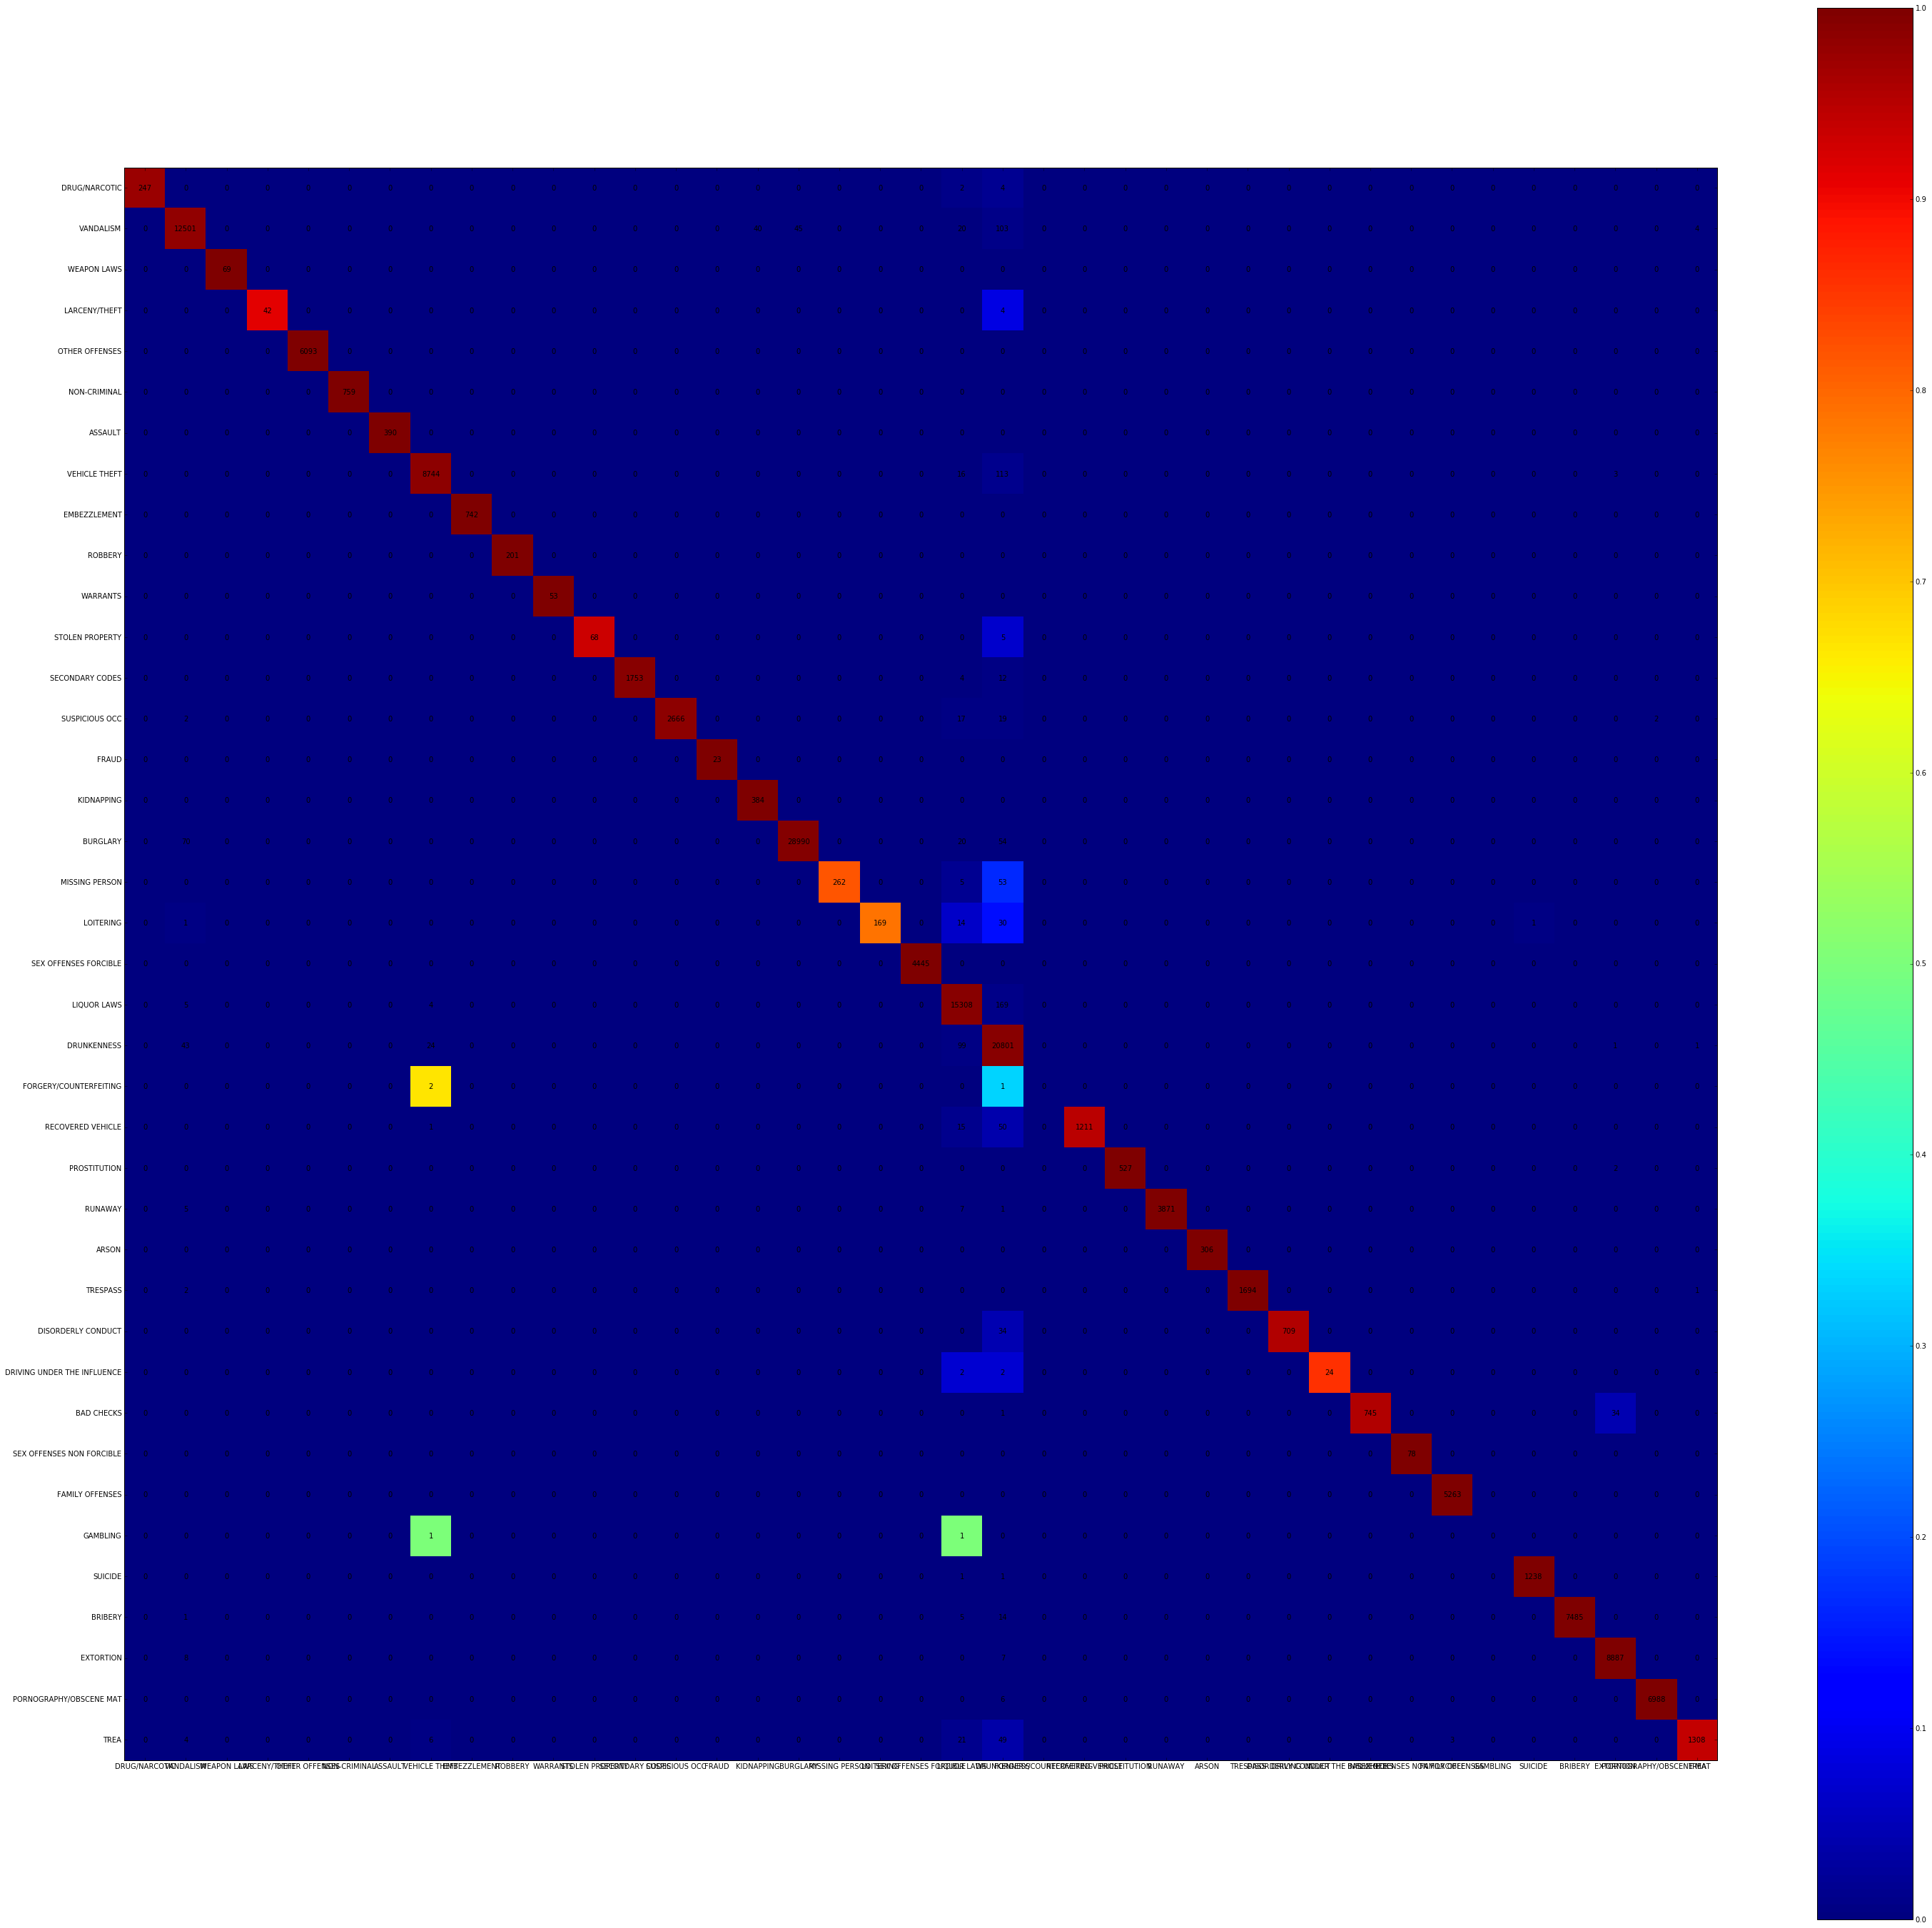

In [56]:
import matplotlib.pyplot as plt
confusion_mat=confusion_matrix(y_, prediction_)
norm_conf = []
for i in confusion_mat:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(50, 48))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = confusion_mat.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(confusion_mat[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = training_data.Category.unique()
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('/Users/user/Desktop/SFCC_confusion_matrix.png', format='png')

### numerical values

### Model fiting & CV

### 